In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [19]:
#!pip install pillow


In [7]:
from IPython.display import display 
from PIL import Image

In [8]:
import warnings 
warnings.filterwarnings('ignore')

In [9]:
from keras.preprocessing import image # for image

In [28]:
#from IPython.display import display 
#from PIL import Image

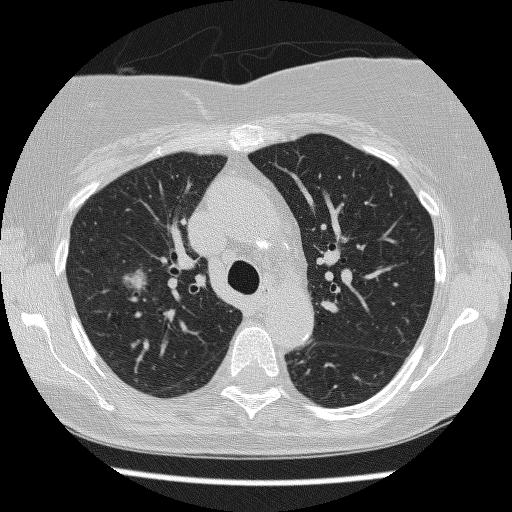

In [10]:
# To Check the single new data
import numpy as np
test_image =image.load_img("C:/Users/DINESH/LungCancer Case-Study/train/malignant/0100008.jpg")
test_image

In [6]:
test_image.size

(512, 512)

In [11]:
from keras.layers import LSTM

In [20]:
## Initialising the CNN
classifier = Sequential()

In [21]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Convolution2D(64,(3,3),input_shape = (250,250,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))         # Here we get 2*2 matrix and select the max value
classifier.add(Dropout(0.25))



## Add another layer
classifier.add(Convolution2D(200,4,4, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

#classifier.add(Convolution2D(150,4,4, activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2,2)))


## Add another layer
classifier.add(Convolution2D(64,4,4, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))


In [22]:
## Flattening                 
classifier.add(Flatten())

In [23]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dropout(.5))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

In [24]:
## Compliling
#from keras.optimizers import SGD
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, featurewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,
        rotation_range=45,width_shift_range=0.2)

In [26]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/DINESH/LungCancer Case-Study/train/',
                                               target_size=(250, 250),
                                               batch_size=16,
                                               class_mode='binary')

Found 820 images belonging to 2 classes.


In [29]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'malignant': 0, 'non-malignant': 1}


In [30]:
test_set = test_datagen.flow_from_directory('C:/Users/DINESH/LungCancer Case-Study/test/',
                                            target_size=(250, 250),
                                            batch_size=16,
                                            class_mode='binary')

Found 183 images belonging to 2 classes.


In [31]:
from keras.preprocessing import image

In [ ]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=100,
        epochs=10,
        validation_data=test_set,
        validation_steps=38)

Epoch 1/10
100/100 [==============================] - 546s 5s/step - loss: 0.7783 - acc: 0.5618 - val_loss: 0.6887 - val_acc: 0.5645
Epoch 2/10
100/100 [==============================] - 507s 5s/step - loss: 0.6880 - acc: 0.5625 - val_loss: 0.6847 - val_acc: 0.5680
Epoch 3/10
100/100 [==============================] - 515s 5s/step - loss: 0.6839 - acc: 0.5719 - val_loss: 0.6837 - val_acc: 0.5663
Epoch 4/10
100/100 [==============================] - 495s 5s/step - loss: 0.6854 - acc: 0.5687 - val_loss: 0.6815 - val_acc: 0.5714
Epoch 5/10
100/100 [==============================] - 496s 5s/step - loss: 0.6872 - acc: 0.5562 - val_loss: 0.6845 - val_acc: 0.5663
Epoch 6/10
100/100 [==============================] - 493s 5s/step - loss: 0.6822 - acc: 0.5769 - val_loss: 0.6821 - val_acc: 0.5734
Epoch 7/10
100/100 [==============================] - 699s 7s/step - loss: 0.6890 - acc: 0.5482 - val_loss: 0.6841 - val_acc: 0.5680
Epoch 8/10
100/100 [==============================] - 61379s 614s/ste

In [40]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/DINESH/LungCancer Case-Study/validation/malignant/IMG-0014-00017.jpg'
                           ,target_size =(250,250,3))

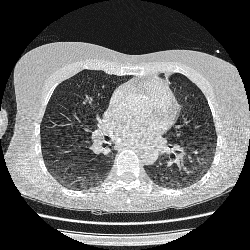

In [41]:
test_image

In [42]:
test_image = np.expand_dims(test_image,axis = 0)

result = classifier.predict(test_image)

In [43]:
## Class of dog and cat

if result[0][0] == 0:
    prediction = 'non-malignant'
else:
    prediction = 'malignant'

In [44]:
prediction

'malignant'